 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [35]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [36]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [63]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [64]:
# Drop nulls
whale_pd.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [65]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [66]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [84]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [85]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [86]:
# Check Data Types
sp500_pd.info()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [87]:
# Fix Data Types
sp500_pd["Close"] = sp500_pd["Close"].str.replace('$','')
sp500_pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [88]:
# Calculate Daily Returns
sp500_pd["Close"] = sp500_pd["Close"].astype('float64')
sp500_pd.info()
sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [81]:
# Drop nulls
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()

S&P 500    0
dtype: int64

In [82]:
# Rename `Close` Column to be specific to this portfolio.
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [48]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

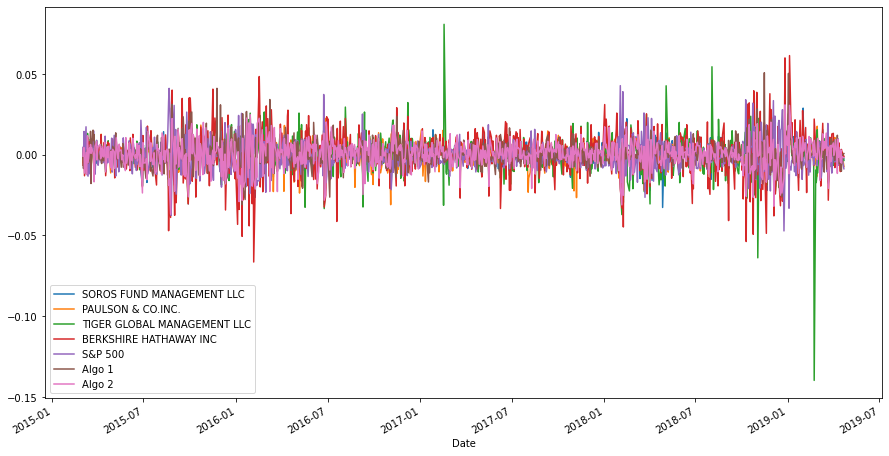

In [49]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(15,8))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

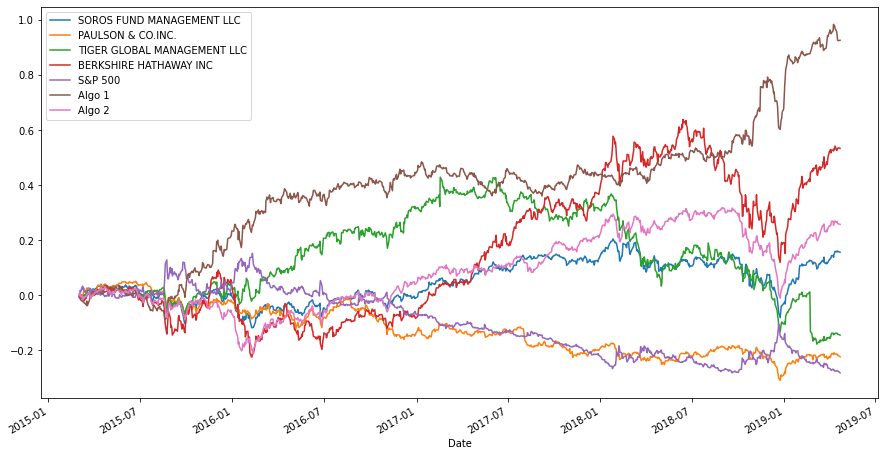

In [50]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_returns).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

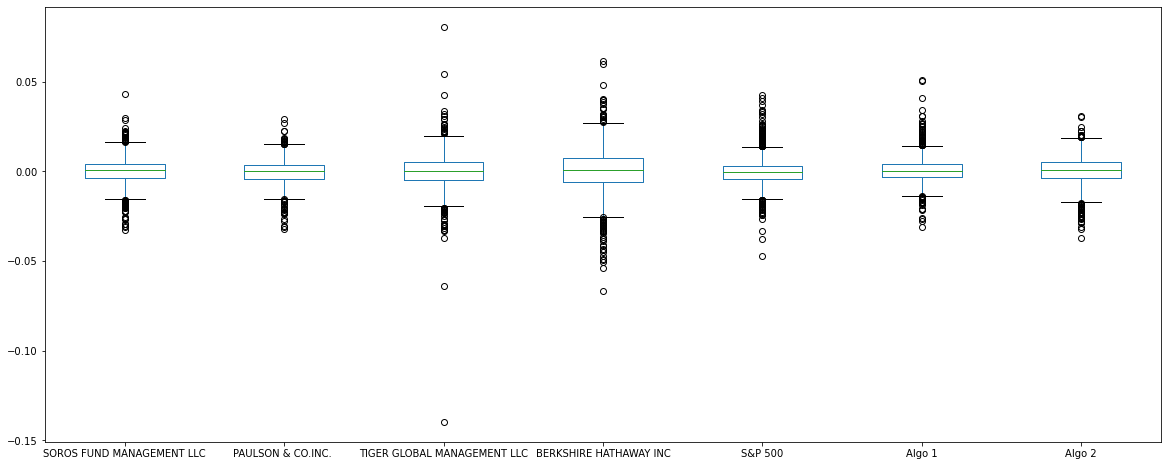

In [51]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,8))

### Calculate Standard Deviations

In [52]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [53]:
# Calculate  the daily standard deviation of S&P 500
riskier = daily_std[daily_std > daily_std["S&P 500"]]
# Determine which portfolios are riskier than the S&P 500
print(riskier) # Below Portfolios are Riskier because their std is GREATER than SP500

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

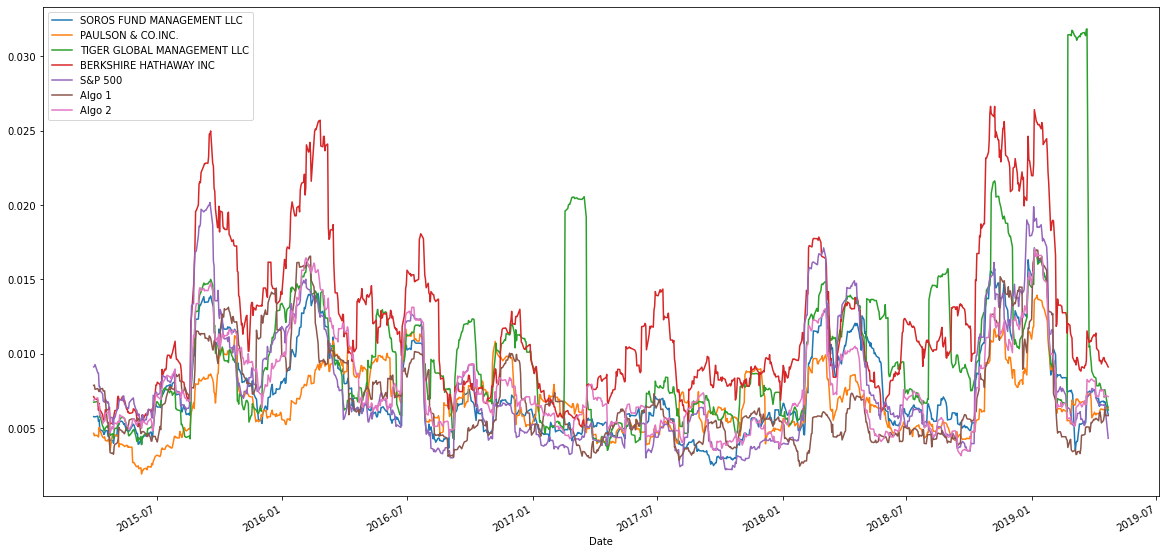

In [91]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000


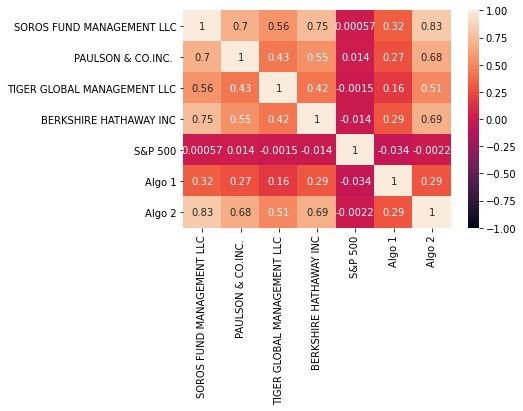

In [93]:
# Calculate the correlation
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
# Display de correlation matrix
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [57]:
# Calculate covariance of a single portfolio
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
# Calculate variance of S&P 500
variance = all_returns['S&P 500'].var()
# Computing beta
algo1_beta = covariance / variance
# Plot beta trend
algo1_beta

-0.020846489408902668

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [94]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003962,0.004700,0.002380
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.007961,0.004162,0.002662
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.008178,0.003419,0.007166
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.009475,0.002999,0.006290


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))

<AxesSubplot:>

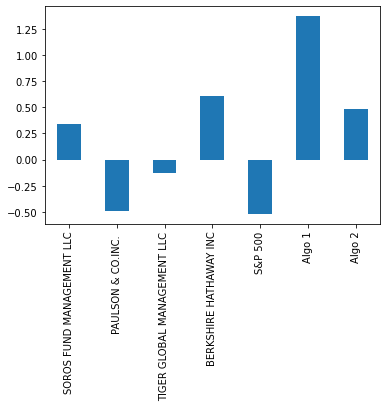

In [96]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [111]:
# Reading data from 1st stock
appl_path = Path('Resources/aapl_historical.csv')
appl_df = pd.read_csv(appl_path, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])
appl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [112]:
# Reading data from 2nd stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [113]:
# Reading data from 3rd stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [114]:
# Join your returns DataFrame to the original returns DataFrame


In [115]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [116]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [117]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [118]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [119]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [120]:
# Calculate Annualzied Sharpe Ratios


In [121]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!